# Contents List

### 01. Importing Libraries
### 02. Creating Path
### 03. Importing Data
### 04. Checking Data
### 05. Data Wrangling
### 06. Data Standardization
### 07. The Elbow Technique
+ 07.1. Observations
### 08. k-means Algorithm
+ 08.1. Observations - LEO Satellites
+ 08.2. Observations - MEO Satellites
+ 08.3. Observations - GEO Satellites
### 09. Descriptive Statistics
+ 09.1. Observations - LEO 
+ 09.2. Observations - MEO 
+ 09.3. Observations - GEO 
### 10. Overall Comments

# 01. Importing Libraries

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm     #for color palettes
import seaborn as sns
import os
import scipy
from scipy import stats #Standardizing data
import sklearn
from sklearn.preprocessing import StandardScaler #Standardizing data
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# 02. Creating a Path

In [192]:
#Create a path
path = r'/Users/aya/Desktop/DataAnalytics/Data-Immersion/Achievement-6/UCS-Satellite-Analysis'

In [193]:
path

'/Users/aya/Desktop/DataAnalytics/Data-Immersion/Achievement-6/UCS-Satellite-Analysis'

# 03. Importing Data

In [195]:
#Import the cleaned Dataset --LEO
df_LEO = pd.read_csv(os.path.join(path, '02-Data', 'Prepared-Data', 'df_LEO.csv'), index_col=0)

In [196]:
#Import the cleaned Dataset --MEO
df_MEO = pd.read_csv(os.path.join(path, '02-Data', 'Prepared-Data', 'df_MEO.csv'), index_col=0)

In [197]:
#Import the cleaned Dataset --GEO
df_GEO = pd.read_csv(os.path.join(path, '02-Data', 'Prepared-Data', 'df_GEO.csv'), index_col=0)

# 04. Checking Data

In [199]:
#Check the dimensions  
df_LEO.shape

(6404, 23)

In [200]:
#Check the data dataframe 
df_LEO.head(3)

,ID Number COSPAR,Satellite Name,Country of Operator/Owner,Operator/Owner,Country of Contractor,Contractor,Users,Purpose,Detailed Purpose,Class of Orbit,...,Launch Mass (kg.),Dry Mass (kg.),Power (watts),Launch Site,Launch Vehicle,Launch Year,Launch Month,Launch Mass Categories,Expected Lifetime Categories,Period Categories
0,2019-089H,1HOPSAT-TD (1st-generation High Optical Perfor...,United States of America,Hera Systems,United States of America,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,...,22.0,NaN,NaN,Satish Dhawan Space Centre,PSLV,2019,12,Light Weight Satellites,Short Expected Lifetime,Fast Rotation Period
2,2017-036L,Aalto-1,Finland,Aalto University,Finland,Aalto University,Civil,Technology Development,NaN,LEO,...,4.5,NaN,4.5,Satish Dhawan Space Centre,PSLV,2017,6,Light Weight Satellites,Short Expected Lifetime,Fast Rotation Period
3,2016-025E,AAt-4,Denmark,University of Aalborg,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,...,1.0,NaN,NaN,Guiana Space Center,Soyuz-2.1a,2016,4,Light Weight Satellites,Medium Expected Lifetime,Fast Rotation Period


In [201]:
#Check the dimensions  
df_MEO.shape

(114, 23)

In [202]:
#Check the data dataframe 
df_MEO.head(3)

,ID Number COSPAR,Satellite Name,Country of Operator/Owner,Operator/Owner,Country of Contractor,Contractor,Users,Purpose,Detailed Purpose,Class of Orbit,...,Launch Mass (kg.),Dry Mass (kg.),Power (watts),Launch Site,Launch Vehicle,Launch Year,Launch Month,Launch Mass Categories,Expected Lifetime Categories,Period Categories
171,2012-018A,Beidou 2-12 (Compass M3),China,Chinese Ministry of National Defense,China,Space Technology Research Institute (part of C...,Multi Users,Navigation/Global Positioning,NaN,MEO,...,2200.0,NaN,NaN,Xichang Satellite Launch Center,Long March 3B,2012,4,Medium Weight Satellites,Long Expected Lifetime,Fast Rotation Period
172,2012-018B,Beidou 2-13 (Compass M4),China,Chinese Ministry of National Defense,China,Space Technology Research Institute (part of C...,Multi Users,Navigation/Global Positioning,NaN,MEO,...,2200.0,NaN,NaN,Xichang Satellite Launch Center,Long March 3B,2012,4,Medium Weight Satellites,Long Expected Lifetime,Fast Rotation Period
179,2015-037A,Beidou 3M-1S,China,Chinese Ministry of National Defense,China,Space Technology Research Institute (part of C...,Multi Users,Navigation/Global Positioning,NaN,MEO,...,800.0,280.0,NaN,Xichang Satellite Launch Center,Long March 3B,2015,7,Light Weight Satellites,Long Expected Lifetime,Fast Rotation Period


In [203]:
#Check the dimensions  
df_GEO.shape

(472, 23)

In [204]:
#Check the data dataframe 
df_GEO.head(3)

,ID Number COSPAR,Satellite Name,Country of Operator/Owner,Operator/Owner,Country of Contractor,Contractor,Users,Purpose,Detailed Purpose,Class of Orbit,...,Launch Mass (kg.),Dry Mass (kg.),Power (watts),Launch Site,Launch Vehicle,Launch Year,Launch Month,Launch Mass Categories,Expected Lifetime Categories,Period Categories
13,2020-095A,"Advanced Orion 10 (Mentor, NRO L-44, USA 311)",United States of America,National Reconnaissance Office (NRO),United States of America,National Reconnaissance Laboratory (?),Military,Earth Observation,Electronic Intelligence,GEO,...,5400.0,NaN,NaN,Cape Canaveral,Delta 4 Heavy,2020,12,Heavy Weight Satellites,Long Expected Lifetime,Slow Rotation Period
14,1998-029A,"Advanced Orion 4 (Mentor, NROL 6, USA 139)",United States of America,National Reconnaissance Office (NRO),United States of America,TRW Space and Electronics,Military,Earth Observation,Electronic Intelligence,GEO,...,5200.0,NaN,NaN,Cape Canaveral,Titan IVA,1998,5,Heavy Weight Satellites,Long Expected Lifetime,Slow Rotation Period
15,2003-041A,"Advanced Orion 5 (Mentor, NROL 19, USA 171)",United States of America,National Reconnaissance Office (NRO),United States of America,TRW Space and Electronics,Military,Earth Observation,Electronic Intelligence,GEO,...,5200.0,NaN,NaN,Cape Canaveral,Titan IV,2003,9,Heavy Weight Satellites,Long Expected Lifetime,Slow Rotation Period


In [205]:
#Ensure that the create graphs you are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

# 05. Data Wrangling

In [207]:
df_LEO.columns

Index(['ID Number COSPAR', 'Satellite Name', 'Country of Operator/Owner',
       'Operator/Owner', 'Country of Contractor', 'Contractor', 'Users',
       'Purpose', 'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Period (minutes)', 'Expected Lifetime (yrs.)', 'Launch Mass (kg.)',
       'Dry Mass (kg.)', 'Power (watts)', 'Launch Site', 'Launch Vehicle',
       'Launch Year', 'Launch Month', 'Launch Mass Categories',
       'Expected Lifetime Categories', 'Period Categories'],
      dtype='object')

In [208]:
#Create a dataframe with only quantitative variables
df_LEO_Quant = df_LEO[['ID Number COSPAR', 'Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)']]

# --df_LEO

In [209]:
#Check the dataframe
df_LEO_Quant.head(3)

,ID Number COSPAR,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes)
0,2019-089H,22.0,0.5,96.08
2,2017-036L,4.5,2.0,94.70
3,2016-025E,1.0,4.0,95.90


In [210]:
#Check the dimensions
df_LEO_Quant.shape

(6404, 4)

In [211]:
#Create a dataframe with only quantitative variables
df_MEO_Quant = df_MEO[['ID Number COSPAR', 'Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)']]

# --df_MEO

In [212]:
#Check the dataframe
df_MEO_Quant.head(3)

,ID Number COSPAR,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes)
171,2012-018A,2200.0,8.0,773.19
172,2012-018B,2200.0,8.0,773.21
179,2015-037A,800.0,8.0,773.20


In [213]:
#Check the dimensions
df_MEO_Quant.shape

(114, 4)

In [214]:
#Create a dataframe with only quantitative variables
df_GEO_Quant = df_GEO[['ID Number COSPAR', 'Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)']]

# --df_GEO

In [215]:
#Check the dataframe
df_GEO_Quant.head(3)

,ID Number COSPAR,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes)
13,2020-095A,5400.0,13.0,1437.60
14,1998-029A,5200.0,13.0,1436.14
15,2003-041A,5200.0,13.0,1436.10


In [216]:
#Check the dimensions
df_GEO_Quant.shape

(472, 4)

# 06. Data Standardization

In [218]:
#Create Standard Scaler to standardize the data
scaler_LEO = StandardScaler()

# --df_LEO

In [219]:
#Standardize the data (fits the Scaler to the data and transforms it)
df_LEO_Quant_stand = pd.DataFrame(scaler_LEO.fit_transform(df_LEO_Quant[['Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)']]),
                                  columns=['Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)'])

# --df_LEO

In [220]:
#Check the dataframe
df_LEO_Quant_stand.head(3)

,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes)
0,-1.570307,-3.834931,-0.016585
1,-1.715413,-2.233873,-0.069734
2,-1.744434,-0.099129,-0.023517


In [221]:
#Create Standard Scaler to standardize the data
scaler_MEO = StandardScaler()

# --df_LEO

In [222]:
#Standardize the data (fits the Scaler to the data and transforms it)
df_MEO_Quant_stand = pd.DataFrame(scaler_MEO.fit_transform(df_MEO_Quant[['Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)']]),
                                  columns=['Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)'])

# --df_MEO

In [223]:
#Check the dataframe
df_MEO_Quant_stand.head(3)

,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes)
0,1.533176,-0.499245,0.746856
1,1.533176,-0.499245,0.746968
2,-0.928766,-0.499245,0.746912


In [224]:
#Create Standard Scaler to standardize the data
scaler_GEO = StandardScaler()

# --df_LEO

In [225]:
#Standardize the data (fits the Scaler to the data and transforms it)
df_GEO_Quant_stand = pd.DataFrame(scaler_GEO.fit_transform(df_GEO_Quant[['Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)']]),
                                  columns=['Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)'])

# --df_MEO

In [226]:
#Check the dataframe
df_GEO_Quant_stand.head(3)

,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes)
0,0.860562,-0.185007,0.000540
1,0.736115,-0.185007,-0.006329
2,0.736115,-0.185007,-0.006517


# 07. The Elbow Technique

In [228]:
#Propose the range of potential numbers of clusters in the data
num_clusters_LEO = range(1, 10) 

# --df_LEO

In [229]:
#Apply your k-means clusters algorithm to the range
kmeans_LEO = [KMeans(n_clusters=i) for i in num_clusters_LEO]

In [230]:
#Create a score to represent a rate of variation for each cluster
score_LEO = [kmeans_LEO[i].fit(df_LEO_Quant_stand).score(df_LEO_Quant_stand) for i in range(len(kmeans_LEO))]

In [231]:
#Check the score
score_LEO

[-19212.000000000025,
 -14778.499947183614,
 -9446.636418205757,
 -5441.566247347297,
 -3901.3376903669055,
 -3304.0654499070347,
 -2248.1630077378654,
 -1431.4174678232607,
 -991.3707953809128]

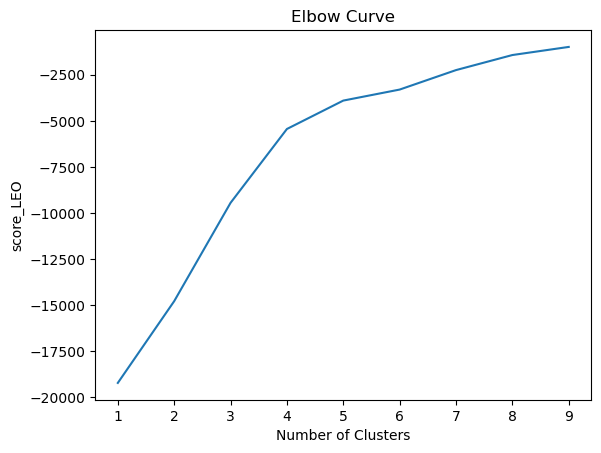

In [232]:
#Plot the elbow curve using PyLab
pl.plot(num_clusters_LEO,score_LEO)
pl.xlabel('Number of Clusters')
pl.ylabel('score_LEO')
pl.title('Elbow Curve')
pl.show()

# --df_LEO

In [233]:
#Propose the range of potential numbers of clusters in the data
num_clusters_MEO = range(1, 10) 

# --df_MEO

In [234]:
#Apply your k-means clusters algorithm to the range
kmeans_MEO = [KMeans(n_clusters=i) for i in num_clusters_MEO]

In [235]:
#Create a score to represent a rate of variation for each cluster
score_MEO = [kmeans_MEO[i].fit(df_MEO_Quant_stand).score(df_MEO_Quant_stand) for i in range(len(kmeans_MEO))]

In [236]:
#Check the score
score_MEO

[-342.0,
 -270.16818484113736,
 -126.96294849370116,
 -52.55332693215383,
 -27.067700018349246,
 -20.93003963400685,
 -12.857033822888724,
 -7.431350555981469,
 -4.424037076523213]

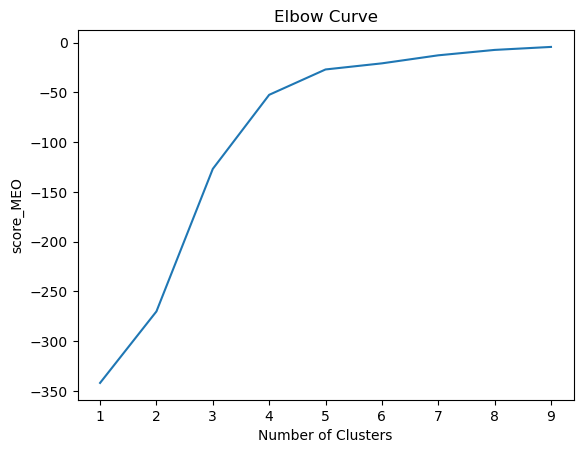

In [237]:
#Plot the elbow curve using PyLab
pl.plot(num_clusters_MEO,score_MEO)
pl.xlabel('Number of Clusters')
pl.ylabel('score_MEO')
pl.title('Elbow Curve')
pl.show()

# --df_MEO

In [238]:
#Propose the range of potential numbers of clusters in the data
num_clusters_GEO = range(1, 10) 

# --df_GEO

In [239]:
#Apply your k-means clusters algorithm to the range
kmeans_GEO = [KMeans(n_clusters=i) for i in num_clusters_GEO]

In [240]:
#Create a score to represent a rate of variation for each cluster
score_GEO = [kmeans_GEO[i].fit(df_GEO_Quant_stand).score(df_GEO_Quant_stand) for i in range(len(kmeans_GEO))]

In [241]:
#Check the score
score_GEO

[-1416.0,
 -993.0488739047885,
 -803.9276658382075,
 -426.07795348437645,
 -351.3252165684065,
 -289.0774909716058,
 -277.95778208753717,
 -195.59046374677618,
 -169.07781274833528]

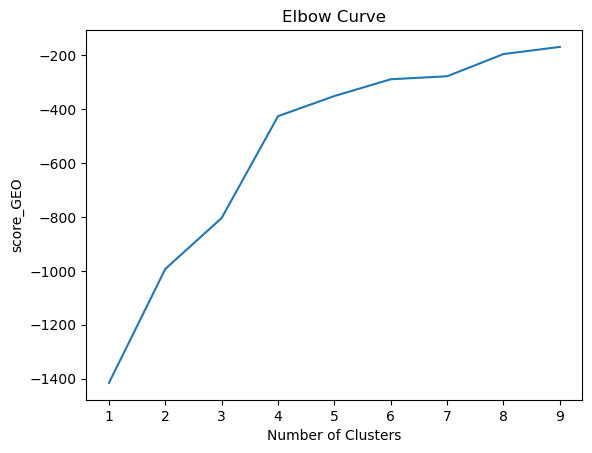

In [242]:
#Plot the elbow curve using PyLab
pl.plot(num_clusters_GEO,score_GEO)
pl.xlabel('Number of Clusters')
pl.ylabel('score_GEO')
pl.title('Elbow Curve')
pl.show()

# --df_GEO

# 07.1. Observations

#### For LEO satellites, 
+ the elbow curve shows a sharp increase up to 3 clusters. After this point, it continues to increase with a few additional breakpoints, and then rises more gradually after reaching 6 clusters.
+ Three clusters were considered because, after running the K-means algorithm, I found that choosing more than three clusters resulted in only few additional data points being assigned to the extra clusters.
+ Therefore, the optimal number of clusters for this LEO dataset is determined to be 3, and the data will be grouped accordingly.


#### For MEO satellites, 
+ the elbow curve shows a sharp increase up to 3 clusters. After this point, it continues to increase with a few additional breakpoints, 4 and 5,  and then rises more gradually after reaching 5 clusters.
+ Two clusters were considered because, after running the K-means algorithm, I found that choosing more than three clusters resulted in only few additional data points being assigned to the extra clusters.
+ Given the small number of samples, using two clusters makes it more suitable to categorize the data points into distinct groups.
+ Therefore, the optimal number of clusters for this MEO dataset is determined to be 2, and the data will be grouped accordingly.

#### For GEO satellites, 
+ the elbow curve shows a sharp increase up to 3 clusters. After this point, it continues to increase with a few additional breakpoints, then rises more gradually after reaching 6 clusters.
+ Three clusters were considered because, after running the K-means algorithm, I found that choosing more than three clusters resulted in only few additional data points being assigned to the extra clusters.
+ Therefore, the optimal number of clusters for this GEO dataset is determined to be 3, and the data will be grouped accordingly.

# 08. k-means Algorithm

In [246]:
#Create the k-means object and Assigns the algorithm with the number of clusters
kmeans_LEO = KMeans(n_clusters = 3) 

# --df_LEO

In [247]:
#Fit the k-means object to the dataframe
kmeans_LEO.fit(df_LEO_Quant_stand)

KMeans(n_clusters=3)

In [248]:
#Create a column in the dataframe with values corresponding to which cluster every observation belongs
df_LEO_Quant_stand['Clusters LEO'] = kmeans_LEO.fit_predict(df_LEO_Quant_stand)

In [249]:
#Check the dataframe
df_LEO_Quant_stand.head(3)

,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes),Clusters LEO
0,-1.570307,-3.834931,-0.016585,0
1,-1.715413,-2.233873,-0.069734,0
2,-1.744434,-0.099129,-0.023517,0


In [250]:
#Check how many observations fall into each cluster
df_LEO_Quant_stand['Clusters LEO'].value_counts()

Clusters LEO
1    4457
0    1945
2       2
Name: count, dtype: int64

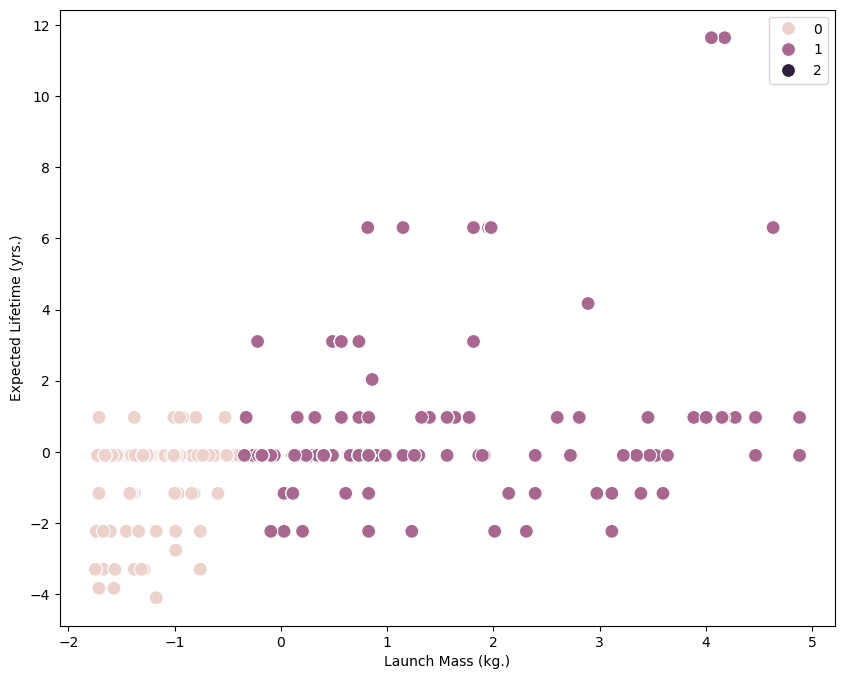

In [251]:
#Plot the clusters for the "Launch Mass (kg.)" and "Expected Lifetime (yrs.)" variables
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_LEO_Quant_stand['Launch Mass (kg.)'],
                     y=df_LEO_Quant_stand['Expected Lifetime (yrs.)'], 
                     hue=kmeans_LEO.labels_, s=100) # --hue-- takes the value of k-means algorithm,  --s-- the size of the points
ax.grid(False) #removes the grid from the background
plt.xlabel('Launch Mass (kg.)')
plt.ylabel('Expected Lifetime (yrs.)')
plt.show()

# --df_LEO
# Launch Mass (kg.) Expected Lifetime (yrs.)Period (minutes)

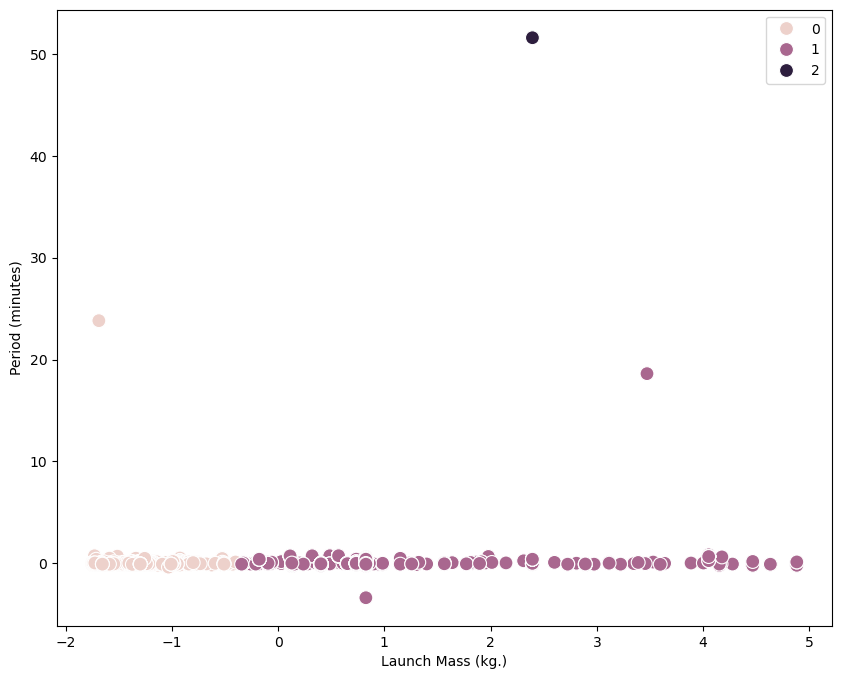

In [252]:
#Plot the clusters for the "Launch Mass (kg.)" and "Period (minutes)" variables
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_LEO_Quant_stand['Launch Mass (kg.)'], 
                     y=df_LEO_Quant_stand['Period (minutes)'], 
                     hue=kmeans_LEO.labels_, s=100)
ax.grid(False) 
plt.xlabel('Launch Mass (kg.)') 
plt.ylabel('Period (minutes)') 
plt.show()

# --df_LEO

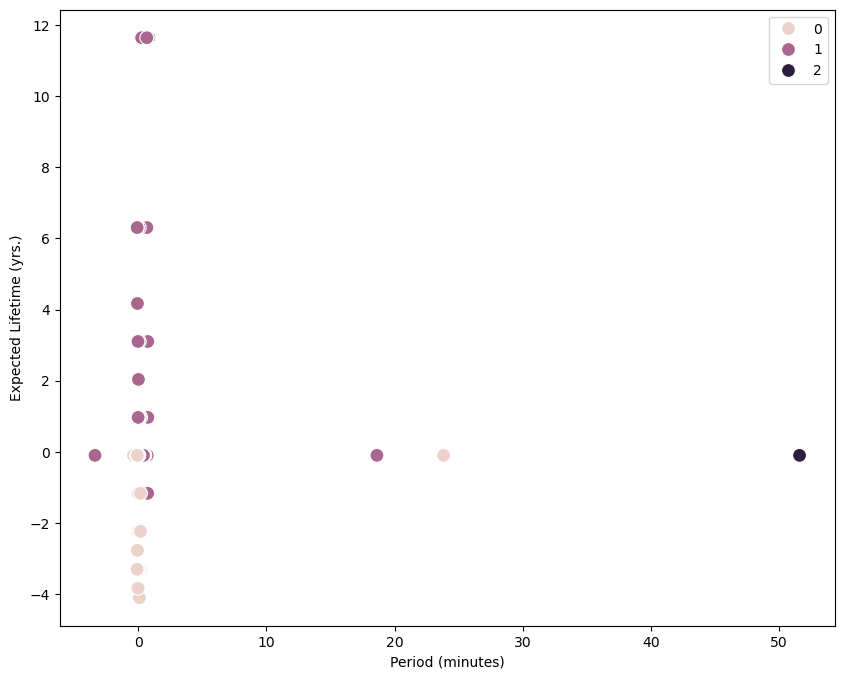

In [253]:
#Plot the clusters for the "Period (minutes)" and "Expected Lifetime (yrs.)" variables
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_LEO_Quant_stand['Period (minutes)'], 
                     y=df_LEO_Quant_stand['Expected Lifetime (yrs.)'], 
                     hue=kmeans_LEO.labels_, s=100)
ax.grid(False) 
plt.xlabel('Period (minutes)') 
plt.ylabel('Expected Lifetime (yrs.)') 
plt.show()

# --df_LEO

# 08.1. Observations - LEO Satellites

#### The variables considered are Launch Mass (kg) and Expected Lifetime (yrs). 
- Cluster 0 is the most populated cluster. The data points suggest that satellites with medium to heavy weights generally have a medium to short expected lifetime.
- Cluster 1 is the second most populated cluster. The data points indicate that satellites with light weights tend to have a short expected lifetime.
Cluster 2 is the least populated cluster. The data points show that satellites with medium to heavy weights tend to have a long expected lifetime.

#### The variables considered are Launch Mass (kg) and Period (minutes).
- Cluster 0 is the most populated cluster. The data points indicate that satellites with low, medium, and heavy weights are more likely to have a short orbital period around the Earth.
- Cluster 1 is the second most populated cluster. The data points show that satellites with only light weights tend to have a short orbital period.
- Cluster 2 is the least populated cluster. The data points suggest that satellites with medium and heavy weights are more likely to have a short orbital period.

#### The variables considered are Period (minutes) and Expected Lifetime (years)
- Cluster 0 is the most populated cluster. The data points indicate that satellites with a short orbital period around the Earth tend to have a medium to short expected lifetime.
- Cluster 1 is the second most populated cluster. The data points show that satellites with a short orbital period tend to have a short expected lifetime.
- Cluster 2 is the least populated cluster. The data points suggest that satellites with a short orbital period are more likely to have a long expected lifetime.


In [255]:
#Create the k-means object and Assigns the algorithm with the number of clusters
kmeans_MEO = KMeans(n_clusters = 2) 

# --df_MEO

In [256]:
#Fit the k-means object to the dataframe
kmeans_MEO.fit(df_MEO_Quant_stand)

KMeans(n_clusters=2)

In [257]:
#Create a column in the dataframe with values corresponding to which cluster every observation belongs
df_MEO_Quant_stand['Clusters MEO'] = kmeans_MEO.fit_predict(df_MEO_Quant_stand)

In [258]:
#Check the dataframe
df_MEO_Quant_stand.head(3)

,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes),Clusters MEO
0,1.533176,-0.499245,0.746856,0
1,1.533176,-0.499245,0.746968,0
2,-0.928766,-0.499245,0.746912,0


In [259]:
#Check how many observations fall into each cluster
df_MEO_Quant_stand['Clusters MEO'].value_counts()

Clusters MEO
0    92
1    22
Name: count, dtype: int64

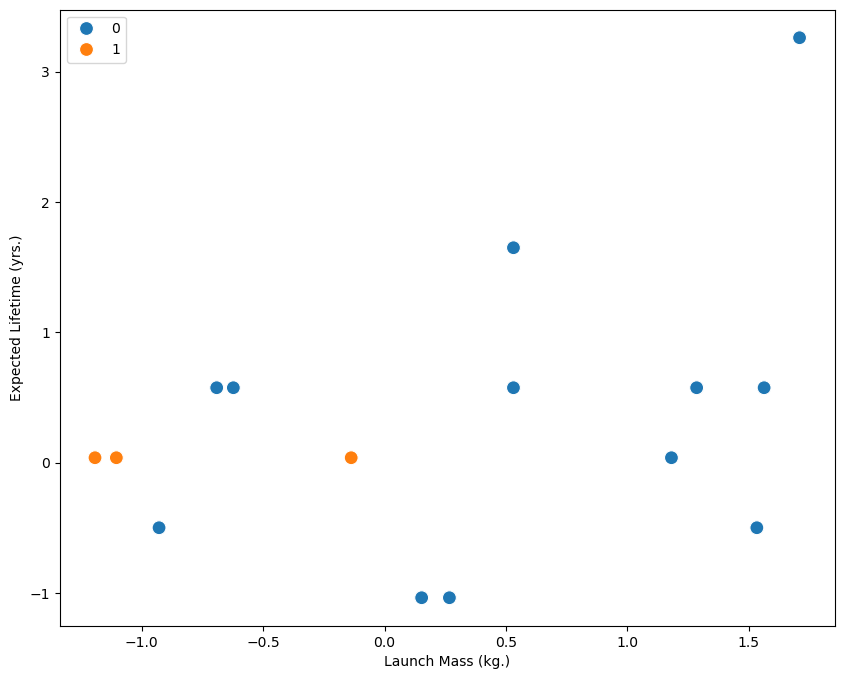

In [260]:
#Plot the clusters for the "Launch Mass (kg.)" and "Expected Lifetime (yrs.)" variables
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_MEO_Quant_stand['Launch Mass (kg.)'],
                     y=df_MEO_Quant_stand['Expected Lifetime (yrs.)'], 
                     hue=kmeans_MEO.labels_, s=100) # --hue-- takes the value of k-means algorithm,  --s-- the size of the points
ax.grid(False) #removes the grid from the background
plt.xlabel('Launch Mass (kg.)')
plt.ylabel('Expected Lifetime (yrs.)')
plt.show()

# --df_MEO
# Launch Mass (kg.) Expected Lifetime (yrs.) Period (minutes)

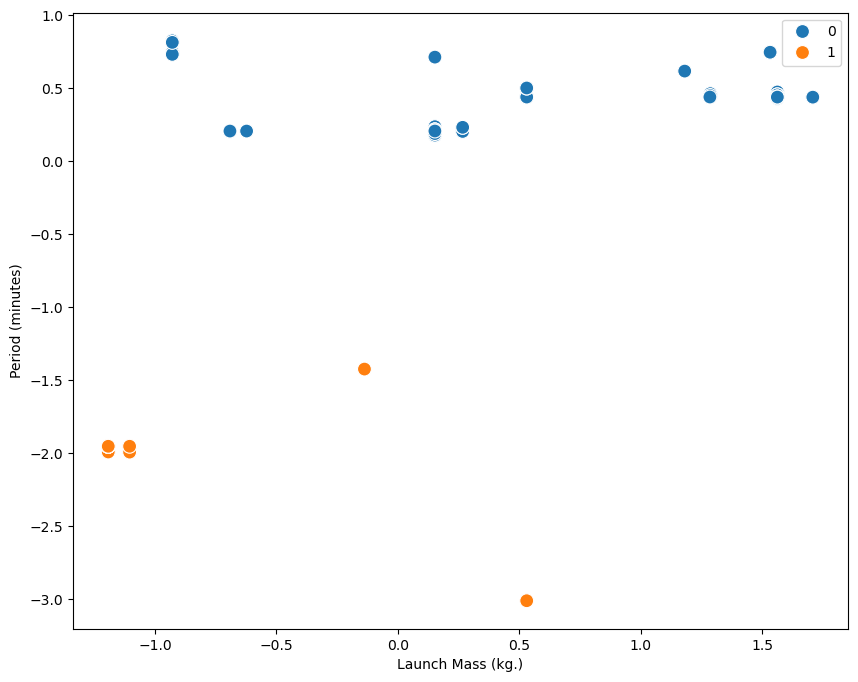

In [261]:
#Plot the clusters for the "Launch Mass (kg.)" and "Period (minutes)" variables
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_MEO_Quant_stand['Launch Mass (kg.)'], 
                     y=df_MEO_Quant_stand['Period (minutes)'], 
                     hue=kmeans_MEO.labels_, s=100)
ax.grid(False) 
plt.xlabel('Launch Mass (kg.)') 
plt.ylabel('Period (minutes)') 
plt.show()

# --df_MEO

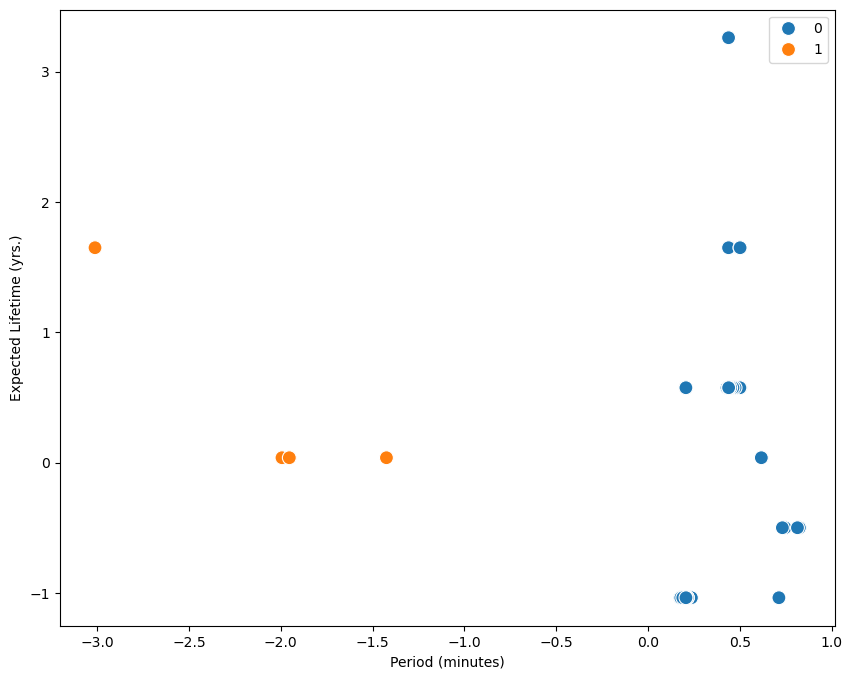

In [262]:
#Plot the clusters for the "Period (minutes)" and "Expected Lifetime (yrs.)" variables
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_MEO_Quant_stand['Period (minutes)'], 
                     y=df_MEO_Quant_stand['Expected Lifetime (yrs.)'], 
                     hue=kmeans_MEO.labels_, s=100)
ax.grid(False) 
plt.xlabel('Period (minutes)') 
plt.ylabel('Expected Lifetime (yrs.)') 
plt.show()

# --df_MEO

# 08.2. Observations - MEO Satellites

#### The variables considered are Launch Mass (kg) and Expected Lifetime (yrs). 
- Cluster 0 is the least populated cluster. The data points suggest that satellites with heavy weights generally have a medium to short expected lifetime.
- Cluster 1 is the most populated cluster. The data points indicate that satellites with light weights tend to have a short expected lifetime.

#### The variables considered are Launch Mass (kg) and Period (minutes).
- Cluster 0 is the least populated cluster. The data points indicate that satellites with heavy weights are more likely to have a long orbital period around the Earth.
- Cluster 1 is the most populated cluster. The data points show that satellites with only medium to heavy weights tend to have a long orbital period.

#### The variables considered are Period (minutes) and Expected Lifetime (years)
- Cluster 0 is the most populated cluster. The data points indicate that satellites with a long orbital period around the Earth tend to have a short, medium, and long expected lifetime.
- Cluster 1 is the second most populated cluster. The data points show that satellites with a medium to long orbital period tend to have a short expected lifetime.


In [264]:
#Create the k-means object and Assigns the algorithm with the number of clusters
kmeans_GEO = KMeans(n_clusters = 3) 

# --df_GEO

In [265]:
#Fit the k-means object to the dataframe
kmeans_GEO.fit(df_GEO_Quant_stand)

KMeans(n_clusters=3)

In [266]:
#create a column in the dataframe with values corresponding to which cluster every observation belongs
df_GEO_Quant_stand['Clusters GEO'] = kmeans_GEO.fit_predict(df_GEO_Quant_stand)

In [267]:
#Check the dataframe
df_GEO_Quant_stand.head(3)

,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes),Clusters GEO
0,0.860562,-0.185007,0.000540,0
1,0.736115,-0.185007,-0.006329,0
2,0.736115,-0.185007,-0.006517,0


In [268]:
#Check how many observations fall into each cluster
df_GEO_Quant_stand['Clusters GEO'].value_counts()

Clusters GEO
2    191
0    189
1     92
Name: count, dtype: int64

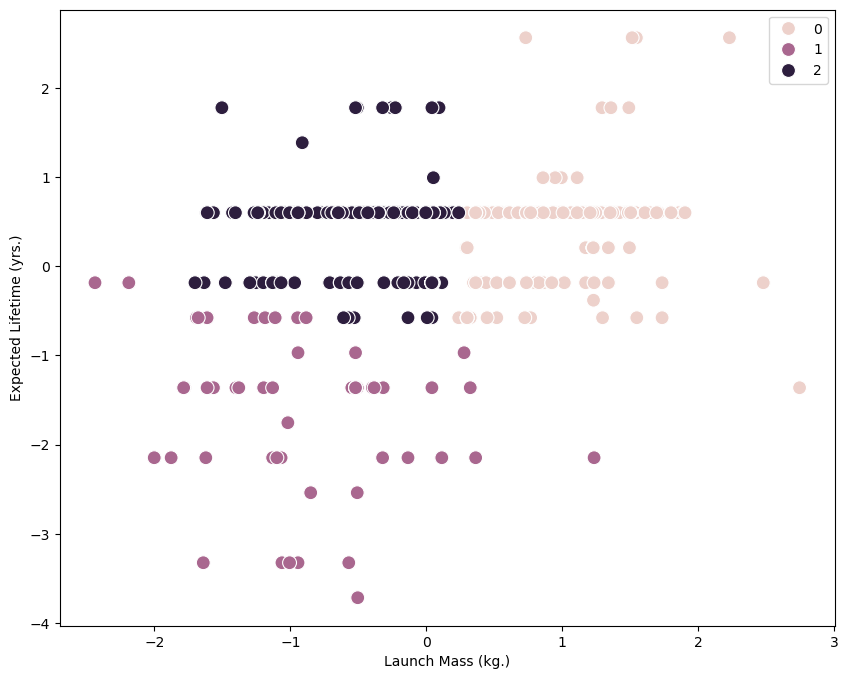

In [269]:
#Plot the clusters for the "Launch Mass (kg.)" and "Expected Lifetime (yrs.)" variables
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_GEO_Quant_stand['Launch Mass (kg.)'],
                     y=df_GEO_Quant_stand['Expected Lifetime (yrs.)'], 
                     hue=kmeans_GEO.labels_, s=100) # --hue-- takes the value of k-means algorithm,  --s-- the size of the points
ax.grid(False) #removes the grid from the background
plt.xlabel('Launch Mass (kg.)')
plt.ylabel('Expected Lifetime (yrs.)')
plt.show()

# --df_GEO
# Launch Mass (kg.) Expected Lifetime (yrs.) Period (minutes)

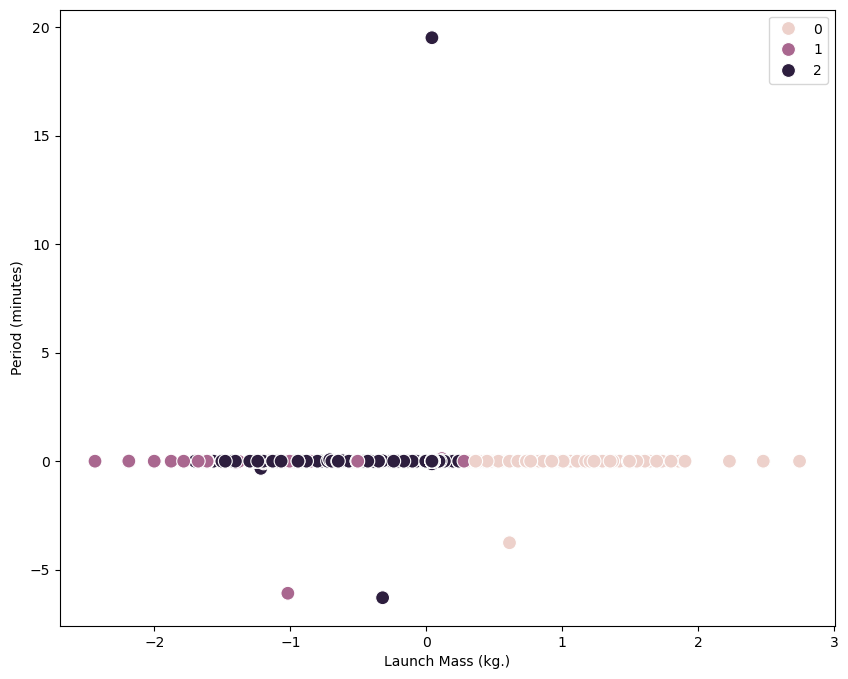

In [270]:
#Plot the clusters for the "Launch Mass (kg.)" and "Period (minutes)" variables
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_GEO_Quant_stand['Launch Mass (kg.)'], 
                     y=df_GEO_Quant_stand['Period (minutes)'], 
                     hue=kmeans_GEO.labels_, s=100)
ax.grid(False) 
plt.xlabel('Launch Mass (kg.)') 
plt.ylabel('Period (minutes)') 
plt.show()

# --df_GEO

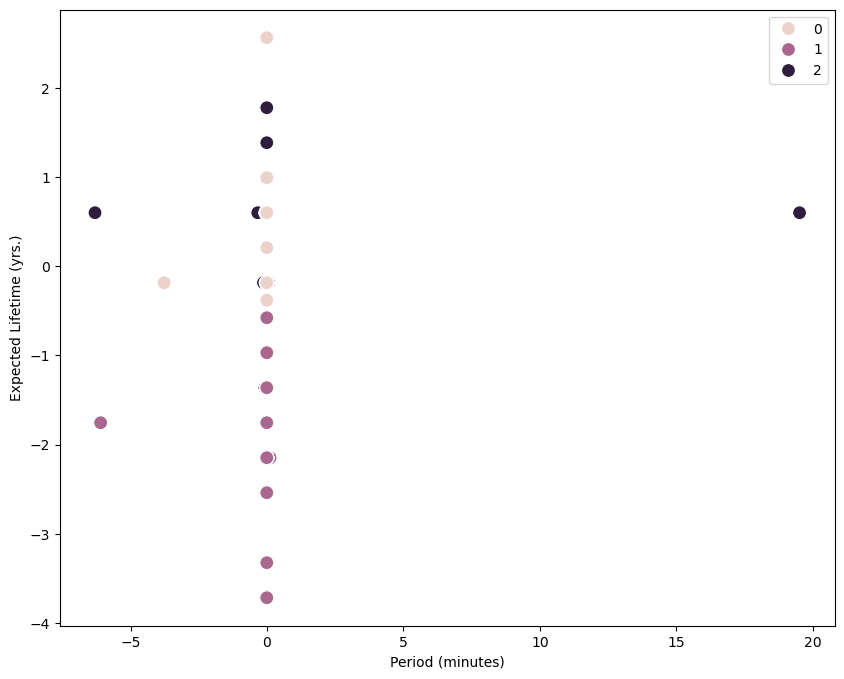

In [271]:
#Plot the clusters for the "Period (minutes)" and "Expected Lifetime (yrs.)" variables
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_GEO_Quant_stand['Period (minutes)'], 
                     y=df_GEO_Quant_stand['Expected Lifetime (yrs.)'], 
                     hue=kmeans_GEO.labels_, s=100)
ax.grid(False) 
plt.xlabel('Period (minutes)') 
plt.ylabel('Expected Lifetime (yrs.)') 
plt.show()

# --df_GEO

# 08.3. Observations - GEO Satellites

#### The variables considered are Launch Mass (kg) and Expected Lifetime (yrs). 
- Cluster 0 is the second most populated cluster. The data points suggest that satellites with medium to low weights generally have a long expected lifetime.
- Cluster 1 is the most populated cluster. The data points indicate that satellites with medium to heavy weights tend to have a medium to long expected lifetime.
- Cluster 2 is the least populated cluster. The data points indicate that satellites with light weights tend to have a medium to  short expected lifetime.


#### The variables considered are Launch Mass (kg) and Period (minutes).
- Cluster 0 is the second most populated cluster. The data points indicate that satellites with medium to light weights are more likely to have a short orbital period around the Earth.
- Cluster 1 is the most populated cluster. The data points show that satellites with only medium to heavy weights tend to have a short orbital period.
- Cluster 2 is the least populated cluster. The data points indicate that satellites with light weights tend to have a short e orbital period.


#### The variables considered are Period (minutes) and Expected Lifetime (years)
- Cluster 0 is the second most populated cluster. The data points indicate that satellites with a short orbital period around the Earth tend to have a long expected lifetime.
- Cluster 1 is the most populated cluster. The data points show that satellites with a short orbital period tend to have a medium expected lifetime.
- Cluster 2 is the least populated cluster. The data points indicate that satellites with short orbital period tend to have a short expected lifetime.


# 09. Descriptive Statistics

In [274]:
#Re-label the clusters from numbers to color names
df_LEO_Quant_stand.loc[df_LEO_Quant_stand['Clusters LEO'] == 2, 'Clusters LEO'] = 'dark purple'

# --df_LEO

/var/folders/62/xltcnc5n7d97j6t5ql_87vym0000gn/T/ipykernel_97674/461167344.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_LEO_Quant_stand.loc[df_LEO_Quant_stand['Clusters LEO'] == 2, 'Clusters LEO'] = 'dark purple'


In [275]:
df_LEO_Quant_stand.loc[df_LEO_Quant_stand['Clusters LEO'] == 1, 'Clusters LEO'] = 'purple'

In [276]:
df_LEO_Quant_stand.loc[df_LEO_Quant_stand['Clusters LEO'] == 0, 'Clusters LEO'] = 'pink'

In [277]:
#Check each variable statistics
df_LEO_Quant_stand.groupby('Clusters LEO').agg({'Launch Mass (kg.)':['mean', 'median'], 
                         'Expected Lifetime (yrs.)':['mean', 'median'], 
                         'Period (minutes)':['mean', 'median']})

# --df_LEO --Launch Mass (kg.) Expected Lifetime (yrs.) Period (minutes)

Launch Mass (kg.)           Expected Lifetime (yrs.)            \
                          mean    median                     mean    median   
Clusters LEO                                                                  
dark purple           2.393174  2.393174                -0.099129 -0.099129   
pink                 -1.225100 -1.421054                -0.043291 -0.099129   
purple                0.533550  0.403142                 0.018936 -0.099129   

             Period (minutes)             
                         mean     median  
Clusters LEO                              
dark purple         51.588661  51.588661  
pink                 0.036502  -0.050477  
purple              -0.039079  -0.035072

# 09.1. Observations - LEO 

#### The dark purple cluster has a significantly larger median for Launch Mass and the period orbithing the earth compared to both the pink and purple clusters. 
#### On the other hand, the Period is significantly larger in the purple cluster than in the pink and dark purple clusters.
#### We can conclude that heavy satellites, with a median Launch Mass of 2.39.04 kg, have a long orbital period around the Earth.

In [279]:
#Re-label the clusters from numbers to color names
df_MEO_Quant_stand.loc[df_MEO_Quant_stand['Clusters MEO'] == 1, 'Clusters MEO'] = 'orange'

# --df_MEO

/var/folders/62/xltcnc5n7d97j6t5ql_87vym0000gn/T/ipykernel_97674/3973303062.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'orange' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_MEO_Quant_stand.loc[df_MEO_Quant_stand['Clusters MEO'] == 1, 'Clusters MEO'] = 'orange'


In [280]:
df_MEO_Quant_stand.loc[df_MEO_Quant_stand['Clusters MEO'] == 0, 'Clusters MEO'] = 'blue'

In [281]:
#Check each variable statistics
df_MEO_Quant_stand.groupby('Clusters MEO').agg({'Launch Mass (kg.)':['mean', 'median'], 
                         'Expected Lifetime (yrs.)':['mean', 'median'], 
                         'Period (minutes)':['mean', 'median']})

# --df_MEO --Launch Mass (kg.) Expected Lifetime (yrs.) Period (minutes)

Launch Mass (kg.)           Expected Lifetime (yrs.)            \
                          mean    median                     mean    median   
Clusters MEO                                                                  
blue                  0.247327  0.152730                -0.026519 -0.499245   
orange               -1.034278 -1.192545                 0.110896  0.037679   

             Period (minutes)            
                         mean    median  
Clusters MEO                             
blue                 0.475900  0.439988  
orange              -1.990127 -1.953799

# 09.2. Observations - MEO 

#### The blue luster has a larger Launch Mass and a longer Period compared to the orange cluster. 
#### However, the orange cluster showed a longer Expected Lifetime.
#### We can conclude that heavier satellites tend to have a shorter Expected Lifetime and a longer orbital period around the Earth. 
#### Conversely, satellites that orbit the Earth for a short period generally have a long Expected Lifetime and a lighter Launch Mass.
#### The sample size is quite small.

In [283]:
#Re-label the clusters from numbers to color names
df_GEO_Quant_stand.loc[df_GEO_Quant_stand['Clusters GEO'] == 2, 'Clusters GEO'] = 'dark purple'

# --df_GEO

/var/folders/62/xltcnc5n7d97j6t5ql_87vym0000gn/T/ipykernel_97674/2323193459.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_GEO_Quant_stand.loc[df_GEO_Quant_stand['Clusters GEO'] == 2, 'Clusters GEO'] = 'dark purple'


In [284]:
df_GEO_Quant_stand.loc[df_GEO_Quant_stand['Clusters GEO'] == 1, 'Clusters GEO'] = 'purple'

In [285]:
df_GEO_Quant_stand.loc[df_GEO_Quant_stand['Clusters GEO'] == 0, 'Clusters GEO'] = 'pink'

In [286]:
#Check each variable statistics
df_GEO_Quant_stand.groupby('Clusters GEO').agg({'Launch Mass (kg.)':['mean', 'median'], 
                         'Expected Lifetime (yrs.)':['mean', 'median'], 
                         'Period (minutes)':['mean', 'median']})

# --df_GEO --Launch Mass (kg.) Expected Lifetime (yrs.) Period (minutes)

Launch Mass (kg.)           Expected Lifetime (yrs.)            \
                          mean    median                     mean    median   
Clusters GEO                                                                  
dark purple          -0.462959 -0.383912                 0.414991  0.599923   
pink                  0.977151  0.922786                 0.343471  0.599923   
purple               -1.046264 -1.065262                -1.567166 -1.362402   

             Period (minutes)            
                         mean    median  
Clusters GEO                             
dark purple          0.060842 -0.006517  
pink                -0.025972 -0.006517  
purple              -0.072957 -0.006517

# 09.3. Observations - GEO 

#### The dark purple cluster also has lighter satellites compared to the pink cluster, this is not the case when compared to the purple cluster.
#### The Expected Lifetime for both the dark purple and pink clusters are the same, and their Launch Mass is similar, both being heavier than those in the purple cluster.
#### This data suggests that the orbital Period of satellites has no significant effect on their Launch Mass and Expected Lifetime whihc makes sense since satellites at the GEO class of orbit are at a fixed position.

# 10. Overall Comments

+ The sample size for the MEO class of orbit is too small, so this subset of data should be excluded from the analysis moving forward.
+ The Period it takes for satellites in the GEO class to orbit the Earth has no effect on other satellite attributes since these satellites are geostationary. 
+ Consequently, the Period variable should be excluded from future analysis.
+ For satellites in the LEO class, the orbital Period also shows no effect on other satellite attributes because these periods fall within a fixed range, which is accounted for during the manufacturing process and throughout their lifetime. 
+ Therefore, the Period variable should be excluded from future analysis.
+ The relationship between Launch Mass and Expected Lifetime appears to be non-linear. 
+ Future analysis should focus on investigating the LEO data further to determine whether changes in Launch Mass over time have increased or decreased the Expected Lifetime of satellites. 
+ This could inform us if advancements in tools and technologies for satellite construction have resulted in longer lifetimes compared to earlier periods.